In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("G:\html\jupyter\data_bank.csv")


In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

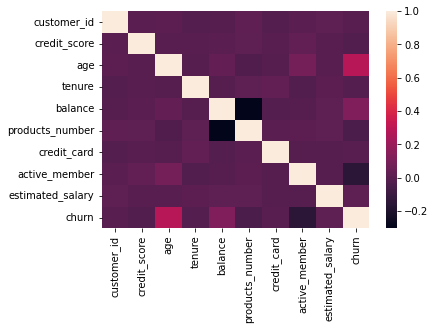

In [4]:
cors=data.corr()
sns.heatmap(cors)

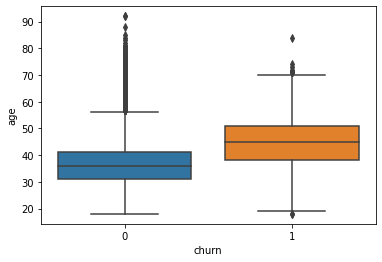

In [5]:
sns.boxplot(x="churn",y="age",data=data)
plt.show()

<AxesSubplot:xlabel='churn', ylabel='balance'>

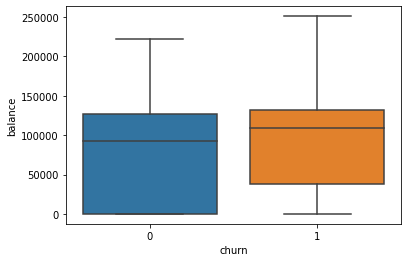

In [6]:
sns.boxplot(x="churn",y="balance",data=data)

<AxesSubplot:xlabel='churn', ylabel='credit_score'>

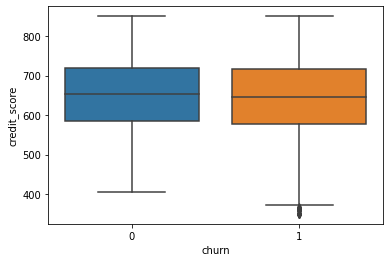

In [7]:
sns.boxplot(x="churn",y="credit_score",data=data)

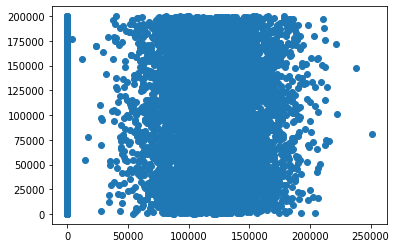

In [8]:
plt.scatter(data['balance'],data['estimated_salary'])

In [9]:
data["gender"].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['encoded']=encoder.fit_transform(data["gender"])
data[['churn','encoded']].head()

,churn,encoded
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [11]:
data['encoded'].value_counts()

1    5457
0    4543
Name: encoded, dtype: int64

In [12]:
m_values=5457
f_values=4543
m_churn,f_churn=0,0
for i in range(0,len(data)):
    if(data['churn'][i]==1 and data['encoded'][i]==1):
        m_churn+=1
    elif(data['churn'][i]==1 and data['encoded'][i]==0):
        f_churn+=1

In [13]:
x=[m_churn,f_churn]
print(x)

[898, 1139]


<BarContainer object of 2 artists>

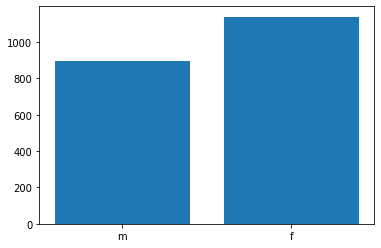

In [14]:

plt.bar(['m','f'],[m_churn,f_churn])

In [15]:
y=data['churn']
x=data[['age','credit_score','encoded','tenure','balance','products_number','credit_card','active_member','estimated_salary']]

In [16]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(x_tr)

<IPython.core.display.Javascript object>

StandardScaler()

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_tr,y_tr)
model.score(x_ts,y_ts)

0.794

In [18]:
model.coef_
#x=data[['age','credit_score','encoded','tenure','balance','products_number','credit_card','active_member','estimated_salary']]

array([[ 4.62242413e-02, -5.15048393e-03, -9.78125251e-04,
        -1.68763838e-03,  3.52595103e-06, -4.41281697e-04,
        -1.66010468e-04, -1.45798208e-03, -1.34152873e-06]])

In [23]:
from sklearn.pipeline import make_pipeline
test_score=[]
for lam in np.arange(0.01,100,0.1):
    pipe=make_pipeline(StandardScaler(),LogisticRegression(C=1/lam))
    pipe.fit(x_tr,y_tr)
    scores=pipe.score(x_ts,y_ts)
    test_score.append(scores)

In [27]:
arr=np.arange(0.01,100,0.1)
arr[425]

42.51

In [28]:
model_final=LogisticRegression(C=1/42.51)
model_final.fit(x_tr,y_tr)

LogisticRegression(C=0.02352387673488591)

In [ ]:
import pickle

pickle_out= open("churn_pred.pkl", mode="wb")
pickle.dump(model_final,pickle_out)
pickle_out.close()

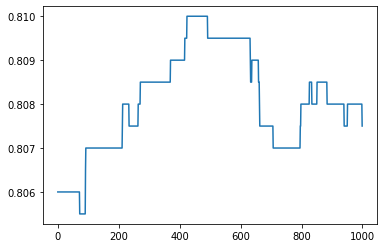

In [24]:
plt.plot(test_score)

In [ ]:
np.argmax(test_score)

624

In [ ]:
l_best=0.01*624*0.1